# Ch3. Neural Network

## Set-up

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install keras

## 3.1-2. Structure of Neural Network & Introducing Keras


![](example1.png)

### 0. Prepare Data
### 1. Building the model
#### 1) By Sequential class

In [2]:
## Up until Ch.7, we stick with the Sequential class model.

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax')) # the input shape here is unspecified; Keras automatically adjusts the next layer to acheive compatibility with the output data of the first layer

#### 2) By Functional API (refer to ch7. for detail)

In [3]:
input_tensor= layers.Input(shape=(784,))
x= layers.Dense(32, activation='relu')(input_tensor) 
output_tensor=layers.Dense(10, activation='softmax')(x) 

model= models.Model(inputs=input_tensor, outputs=output_tensor)

### 2. Compiling

In [4]:
# When compiling the model, the process is the same regardless of whichever model you used.
# Parameters: optimizer & loss & metrics

from keras import optimizers

#line 7: delivering an object to the parameter, line 8~9: Default options in Keras
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #lr stands for Learning Rate
              loss='mse',   
              metrics=['accuracy'])

#### ※ Learning Rate
![](lr.png)

### 3. Training the model

In [9]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

NameError: name 'target_tensor' is not defined

## 3.4. Binary classification using movie reviews

In [5]:
# Internet Movie Database, 50000 extreme reviews, 50% positive, 50% negative
from keras.datasets import imdb 

### 0. Uploading the IMDB dataset

In [55]:
#Make sure to seperate test data from train data
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(
    num_words=10000) #Use the most frequent 10000 words

In [95]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [113]:
print(train_data.shape)

(25000,)


In [102]:
train_data[20]

[1,
 617,
 11,
 3875,
 17,
 2,
 14,
 966,
 78,
 20,
 9,
 38,
 78,
 15,
 25,
 413,
 2,
 5,
 28,
 8,
 106,
 12,
 8,
 4,
 130,
 43,
 8,
 67,
 48,
 12,
 100,
 79,
 101,
 433,
 5,
 12,
 127,
 4,
 769,
 9,
 38,
 727,
 12,
 186,
 398,
 34,
 6,
 312,
 396,
 2,
 707,
 4,
 732,
 26,
 1235,
 21,
 2,
 128,
 74,
 4,
 2,
 5,
 4,
 116,
 9,
 1639,
 10,
 10,
 4,
 2,
 2,
 186,
 8,
 28,
 77,
 2586,
 39,
 4,
 4135,
 2,
 7,
 2,
 2,
 50,
 161,
 306,
 8,
 30,
 6,
 686,
 204,
 326,
 11,
 4,
 226,
 20,
 10,
 10,
 13,
 258,
 14,
 20,
 8,
 30,
 38,
 78,
 15,
 13,
 1498,
 91,
 7,
 4,
 96,
 143,
 10,
 10,
 9859,
 9064,
 144,
 3261,
 27,
 419,
 11,
 902,
 29,
 540,
 887,
 4,
 278]

In [52]:
train_labels[20]

0

In [107]:
max([max(sequence) for sequence in train_data]) # word index does not exceed 10000

9999

#### Optional) Decode one indexed data to retrieve the original text

In [88]:
word_index=imdb.get_word_index()
reverse_word_index=dict(  
    [(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[20]])

In [108]:
[k for (k,v) in word_index.items() if v<=3]

['a', 'the', 'and']

In [89]:
decoded_review

"? shown in australia as ? this incredibly bad movie is so bad that you become ? and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school ? class the sets are pathetic but ? better than the ? and the acting is wooden br br the ? ? seems to have been stolen from the props ? of ? ? there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

### 1. Prepare data for Neural Network (Converting list to tensor)
##### 1) Embedding: transforming into integer tensor. (from Ch. 6)
##### 2)One-hot encoding: " into vectors comprised of either 0 and 1. (for now)

In [91]:
#Covert list into one-hot vector(binary vectors)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension)) # Creating an all-zero matrix with shape((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [112]:
print(x_train.shape)

(25000, 10000)


In [119]:
x_train[20]

array([0., 1., 1., ..., 0., 0., 0.])

In [120]:
x_test[20]

array([0., 1., 1., ..., 0., 0., 0.])

In [123]:
#Vectorize Labels
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [124]:
y_train[20]

0.0

### 2. Building the model

In [125]:
from keras import models
from keras import layers

model=models.Sequential()
# of hidden units =16
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) ## hidden layer1
model.add(layers.Dense(16, activation='relu')) ## hidden layer 2
model.add(layers.Dense(1, activation='sigmoid')) ## predict the level of emotion in reviews (0 to 1) 


![](ex2.png)

### 3. Prepare Validation data

In [126]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

### 4. Compiling & Training

In [127]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', ## crossentrophy is the best choice when it comes to calculating the probability
              metrics=['acc'])
              
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 10s 244ms/step - loss: 0.5891 - acc: 0.7032 - val_loss: 0.4017 - val_acc: 0.8555
Epoch 2/20
30/30 [==============================] - 4s 132ms/step - loss: 0.3286 - acc: 0.8987 - val_loss: 0.3093 - val_acc: 0.8850
Epoch 3/20
30/30 [==============================] - 3s 104ms/step - loss: 0.2280 - acc: 0.9323 - val_loss: 0.2854 - val_acc: 0.8877
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1751 - acc: 0.9485 - val_loss: 0.3159 - val_acc: 0.8720
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1435 - acc: 0.9556 - val_loss: 0.2795 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1167 - acc: 0.9685 - val_loss: 0.2899 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1005 - acc: 0.9733 - val_loss: 0.3066 - val_acc: 0.8847
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0788

##### Compiling Option: 매개변수에  자신만의 객체 전달하기

In [134]:
##Optional
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,  
              metrics=[metrics.binary_accuracy])

In [135]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 5.1) Plotting training and validation loss

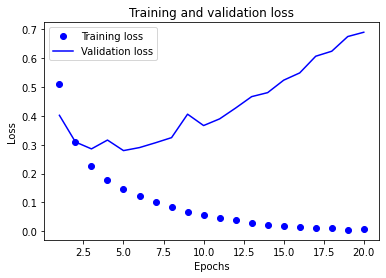

In [137]:
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 5.3) Plotting Training and validation accuracy

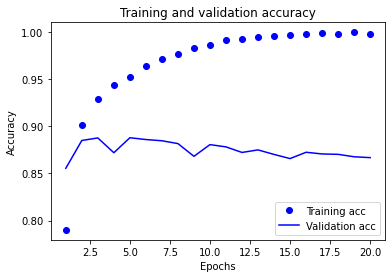

In [140]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


### 6. Retraining the model to prevent overfitting

In [141]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test,y_test)


Epoch 1/4
49/49 [==============================] - 6s 18ms/step - loss: 0.5525 - accuracy: 0.7355
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2714 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2042 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8834


In [142]:
results

[0.2938579022884369, 0.8833600282669067]

In [143]:
model.predict(x_test)

array([[0.19708532],
       [0.99930024],
       [0.93248165],
       ...,
       [0.14394116],
       [0.07909048],
       [0.64218986]], dtype=float32)

## 3.5 Multiple classification

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words= 10000)

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [146]:
len(train_data)

8982

In [147]:
len(test_data)

2246

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [9]:
reverse_word_index.get(1)

'the'

In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
train_labels[90]

4

### 3.5.2 Data

In [133]:
import numpy as np

def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
        return results

In [134]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### one_hot encoding

In [135]:
def to_one_hot(labels, dimension = 46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1.
    return results

In [136]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#### use functions in keras

In [137]:
from keras.utils.np_utils import to_categorical

In [138]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labes = to_categorical(test_labels)

### 3.5.3 Model

In [139]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

In [140]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

#### ReLU function

$ h(x) = \begin{cases} x, & \mbox{if }x\mbox{>0} \\ 0, & \mbox{if} x\mbox{ $\le$ 0}\end{cases} $

- ReLU shows the value if the input is bigger than zero, otherwise shows zero

- It is one of the activation functions (a function that converts the sum of the input signals into an output signal) and plays a role in determining whether the sum of the input signals causes activation.

#### Softmax function

$y_k = {exp(a_k) \over \sum_{i=1}^n exp(a_i)} $

- 0<output of softmax<1
- The sum of output = 1
- Can be inferred as 'probability'

In [160]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

#### Cross entropy Loss

$E = - \sum_k t_k log(y_k) $

- $y_k$ 는 신경망의 출력, $t_k$는 정답 레이블 (1또는 0 : 원-핫 인코딩)

- 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식

- 정답일 때의 출력이 작아질수록 오차는 커짐 

### 3.5.4 Validation

In [161]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

In [162]:
history= model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size = 512,
                  validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 3.3153 - accuracy: 0.3347 - val_loss: 1.8794 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.6389 - accuracy: 0.6701 - val_loss: 1.3408 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1373 - accuracy: 0.7643 - val_loss: 1.1647 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8876 - accuracy: 0.8145 - val_loss: 1.0535 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6872 - accuracy: 0.8561 - val_loss: 0.9737 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5791 - accuracy: 0.8823 - val_loss: 0.9450 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4462 - accuracy: 0.9093 - val_loss: 0.9202 - val_accuracy: 0.8090
Epoch 8/20
16

In [163]:
history_dict= history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

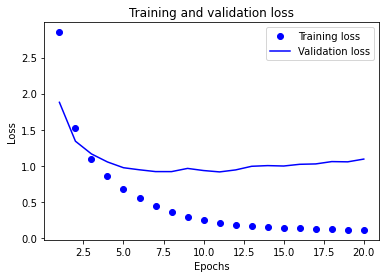

In [164]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [165]:
plt.clf()

<Figure size 432x288 with 0 Axes>

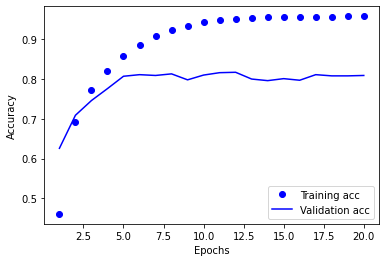

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Overfitting problem

- 한 데이터셋에만 지나치게 최적화된 상태
- 훈련 데이터에서는 잘 되지만 실제 시험 데이터에서는 제대로 학습과 평가를 수행하지 못하는 문제 발생


#### 모델을 처음부터 다시 훈련하기

In [169]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [171]:
model.compile(optimizer = 'rmsprop',
             loss= 'categorical_crossentropy',
             metrics = ['accuracy'])

In [172]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size = 512,
         validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 3.2142 - accuracy: 0.3680 - val_loss: 1.7552 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 0s 25ms/step - loss: 1.5244 - accuracy: 0.6921 - val_loss: 1.2831 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.0814 - accuracy: 0.7710 - val_loss: 1.1154 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.8337 - accuracy: 0.8251 - val_loss: 1.0010 - val_accuracy: 0.8030
Epoch 5/9
16/16 [==============================] - 0s 21ms/step - loss: 0.6692 - accuracy: 0.8675 - val_loss: 0.9685 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5100 - accuracy: 0.8987 - val_loss: 0.9092 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4055 - accuracy: 0.9188 - val_loss: 0.8765 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [173]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 1.0104 - accuracy: 0.7858


In [174]:
print(results)

[1.0103936195373535, 0.7858415246009827]


#### 무작위로 분류하는 경우

In [175]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array= np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.1834372217275156

### 3.5.5 새로운 데이터에 대해 예측하기

In [176]:
predictions = model.predict(x_test) #확률분포를 반환

In [181]:
predictions[0].shape

(46,)

In [183]:
np.sum(predictions[0])

0.9999998

In [184]:
np.argmax(predictions[0])

3

### 3.5.6 레이블과 손실을 다루는 다른 방법

In [185]:
y_train= np.array(train_labels)
y_test= np.array(test_labels)

In [186]:
model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy', # 정수 레이블을 사용할 때
             metrics=['acc'])

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

In [196]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [201]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [202]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.0853 - accuracy: 0.3633 - val_loss: 1.8504 - val_accuracy: 0.5810
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.6699 - accuracy: 0.6017 - val_loss: 1.4887 - val_accuracy: 0.6210
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3302 - accuracy: 0.6635 - val_loss: 1.3696 - val_accuracy: 0.6690
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1090 - accuracy: 0.7213 - val_loss: 1.3145 - val_accuracy: 0.6780
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9933 - accuracy: 0.7404 - val_loss: 1.2793 - val_accuracy: 0.6910
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9129 - accuracy: 0.7631 - val_loss: 1.2889 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8203 - accuracy: 0.7843 - val_loss: 1.2857 - val_accuracy: 0.7110
Epoch 8/20
63/63 [=

## 3.6 주택 가격 예측 : 회귀 문제

In [203]:
from keras.datasets import boston_housing

In [204]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [205]:
train_data.shape

(404, 13)

In [206]:
test_data.shape

(102, 13)

In [207]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 3.6.2 데이터 준비

In [208]:
mean= train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

In [209]:
test_data -= mean
test_data /= std # train data에서 얻은 mean과 standard deviation으로 정규화 시켜주어야 함

### 3.6.3 모델 구성

In [233]:
from keras import models
from keras import layers

In [248]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu',
                          input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return model

### 평균 제곱 오차 (MSE) -> $E = {1\over 2} \sum_{k}(y_k - t_k) ^2 $

평균 제곱 오차가 작을수록 정답에 더 가까운 것으로 판단


- MAE: 평균절대오차: 예측과 타깃 사이 거리의 절댓값

### 3.6.4 K-겹 검증을 사용한 훈련 검증

In [249]:
import numpy as np

In [250]:
k = 4

In [272]:
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, 
         epochs = num_epochs, batch_size = 1, verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [266]:
all_scores

[2.4410696029663086, 2.4122154712677, 2.5827014446258545, 2.3676159381866455]

In [267]:
np.mean(all_scores)

2.450900614261627

In [281]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
              validation_data = (val_data, val_targets),
              epochs = num_epochs, 
              batch_size = 1, 
              verbose = 0)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [292]:
len(all_mae_histories[0])

500

In [280]:
history_mae= history.history
history_mae.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [282]:
all_mae_histories

[[3.6783716678619385,
  2.9794082641601562,
  2.8161749839782715,
  2.4944236278533936,
  2.0488715171813965,
  2.329210042953491,
  1.9489914178848267,
  2.0712313652038574,
  2.081742286682129,
  2.4162919521331787,
  2.1313207149505615,
  2.0911331176757812,
  2.1891820430755615,
  1.784919023513794,
  2.1912708282470703,
  2.058053493499756,
  1.9294430017471313,
  2.244811773300171,
  2.35600209236145,
  1.7549901008605957,
  1.9594874382019043,
  1.9317865371704102,
  1.8710016012191772,
  1.8683127164840698,
  1.9707826375961304,
  2.0606138706207275,
  1.9891221523284912,
  1.8503063917160034,
  2.3907065391540527,
  2.232515811920166,
  1.8446133136749268,
  1.8369252681732178,
  2.19405198097229,
  2.073702573776245,
  1.9334452152252197,
  2.0354421138763428,
  1.8353638648986816,
  1.8866087198257446,
  2.2397773265838623,
  1.9806530475616455,
  1.9444923400878906,
  1.9605441093444824,
  2.0620384216308594,
  2.0383429527282715,
  1.9873371124267578,
  2.127972364425659,


In [283]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
for i in range(num_epochs):
    for x in all_mae_histories:
        np.mean(x[i])

In [293]:
len( all_mae_histories)

4

In [284]:
average_mae_history

[4.52792888879776,
 3.416253089904785,
 3.0709070563316345,
 2.91729199886322,
 2.656619966030121,
 2.6723501086235046,
 2.6247654855251312,
 2.6356507539749146,
 2.6242449283599854,
 2.6284653544425964,
 2.5048065781593323,
 2.492530405521393,
 2.531640589237213,
 2.4116272926330566,
 2.4974958896636963,
 2.5229024291038513,
 2.4811646044254303,
 2.512376546859741,
 2.484279990196228,
 2.4208083748817444,
 2.3657721877098083,
 2.455604076385498,
 2.4100827276706696,
 2.464828699827194,
 2.329991966485977,
 2.4201017022132874,
 2.4808332920074463,
 2.3106116950511932,
 2.49010568857193,
 2.5061538219451904,
 2.4428391456604004,
 2.3252495527267456,
 2.4217020869255066,
 2.4131784439086914,
 2.388449013233185,
 2.3500550389289856,
 2.3487608432769775,
 2.3413842022418976,
 2.550005555152893,
 2.4945991039276123,
 2.323263645172119,
 2.5243667364120483,
 2.394815504550934,
 2.499182879924774,
 2.3206416964530945,
 2.3934324979782104,
 2.400306522846222,
 2.4653385281562805,
 2.4317176043

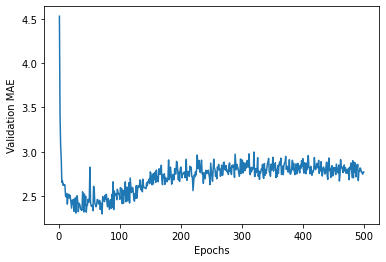

In [294]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

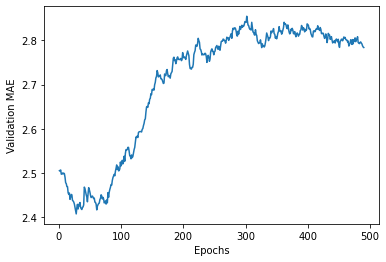

In [298]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 에포크가 약 80번째 이후로 MAE 가 증가하는 것을 볼 수 있음-> 오버피팅 문제 시작

In [305]:
model=build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 18.1343 - mae: 2.6062


In [307]:
test_mae_score

2.606170415878296